# Project 1 team 11.
---

### Team members

- Dylan Kelly
- Melissa Wegrzyn
- Sree Rana Pavan Vannemsetti
- Shengnan Ma
 

In [55]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path
%matplotlib inline

# Path to CSV
life_expectancy_path = Path("Resources/Life_Expectancy_Data_PRJ1.csv")

# Read CSV
life_expectancy = pd.read_csv(life_expectancy_path)
life_expectancy.head()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,Developing,59,67,73,85,64,0.01,73.523582,...,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,Developing,79,51,87,67,66,0.01,73.219243,...,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,Developing,65,81,63,91,69,0.01,78.184215,...,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,Developing,76,75,57,72,71,0.01,7.097109,...,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,9.5


In [56]:
# 2a. Global Yearly Summery Shengnan
# Groupby Year
life_expectancy_year = life_expectancy.groupby(["Year"])


# Total population, total GDP,and total expenditure
life_expectancy_yearly = life_expectancy_year[["Population", "GDP","Total expenditure"]].sum()
life_expectancy_yearly


,Population,GDP,Total expenditure
Year,,,
2000,4.688464e+09,9.217714e+05,991.59
2001,4.823601e+09,9.501094e+05,990.89
2002,4.353712e+09,9.119893e+05,1005.85
2003,4.915799e+09,9.419992e+05,1037.22
2004,5.930909e+09,1.303547e+06,1041.29
2005,6.230354e+09,1.340683e+06,1053.98
2006,5.958931e+09,1.362238e+06,1014.14
2007,6.582161e+09,1.553771e+06,1003.20
2008,5.456957e+09,1.878895e+06,1019.39


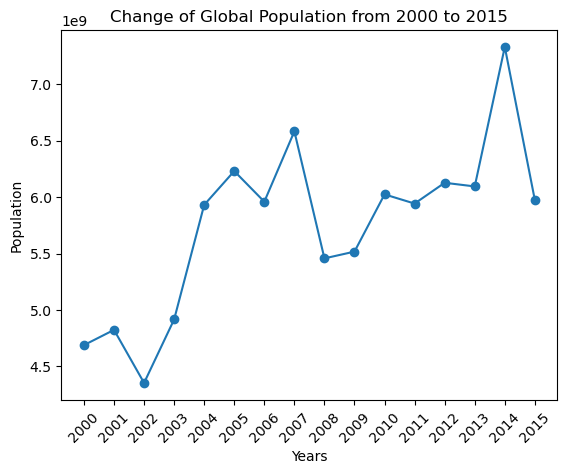

In [57]:
# 2a. Global Yearly Summery Graphs Shengnan
# Graph for the global change of population over 15 years
plt.plot(life_expectancy_yearly.index, life_expectancy_yearly["Population"], marker = "o")

plt.xticks((range(2000, 2016)))
plt.xticks(rotation=45)

plt.title("Change of Global Population from 2000 to 2015")
plt.xlabel("Years")
plt.ylabel("Population")

plt.show()

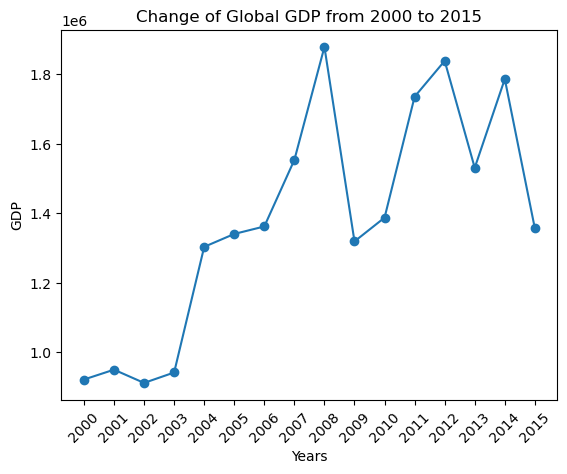

In [58]:
# 2a. Global Yearly Summery Graphs Shengnan
# Graph for the global change of GDP over 15 years
plt.plot(life_expectancy_yearly.index, life_expectancy_yearly["GDP"], marker = "o")

plt.xticks((range(2000, 2016)))
plt.xticks(rotation=45)

plt.title("Change of Global GDP from 2000 to 2015")
plt.xlabel("Years")
plt.ylabel("GDP")

plt.show()

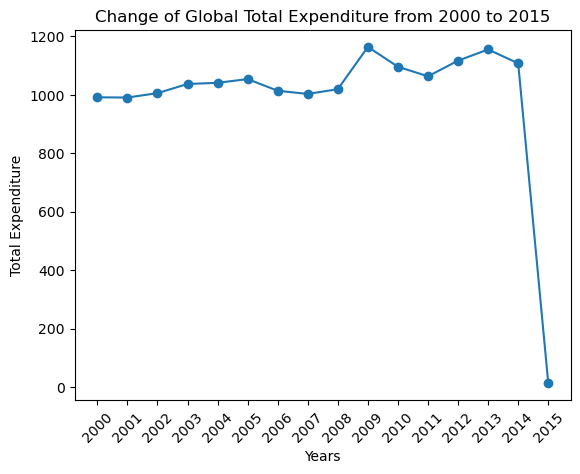

In [59]:
# 2a. Global Yearly Summery Graphs Shengnan
# Graph for the global change of total expenditure over 15 years
plt.plot(life_expectancy_yearly.index, life_expectancy_yearly["Total expenditure"], marker = "o")

plt.xticks((range(2000, 2016)))
plt.xticks(rotation=45)

plt.title("Change of Global Total Expenditure from 2000 to 2015")
plt.xlabel("Years")
plt.ylabel("Total Expenditure")

plt.show()

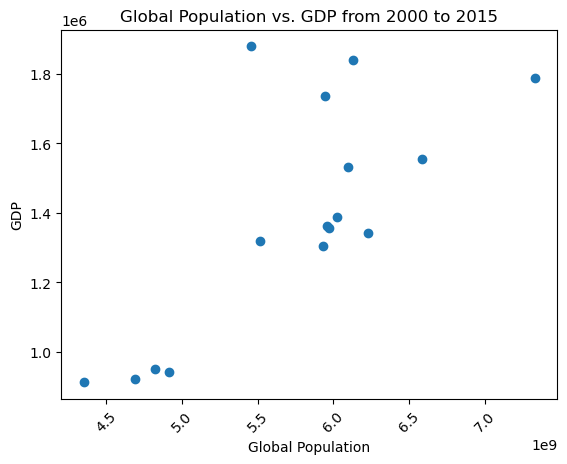

In [60]:
# 2a. Global Yearly Summery Graphs Shengnan
# Graph for the global change of population vs. GDP
x_values = life_expectancy_yearly["Population"]
y_values = life_expectancy_yearly["GDP"]
plt.scatter(x_values,y_values)

# plt.xticks((range(2000, 2016)))
plt.xticks(rotation=45)

plt.title("Global Population vs. GDP from 2000 to 2015")
plt.xlabel("Global Population")
plt.ylabel("GDP")

plt.show()

The r-value is 0.75 and r-squared is 0.56
The correlation between Population and GDP is 0.75
y = 0.0x + -477384.12


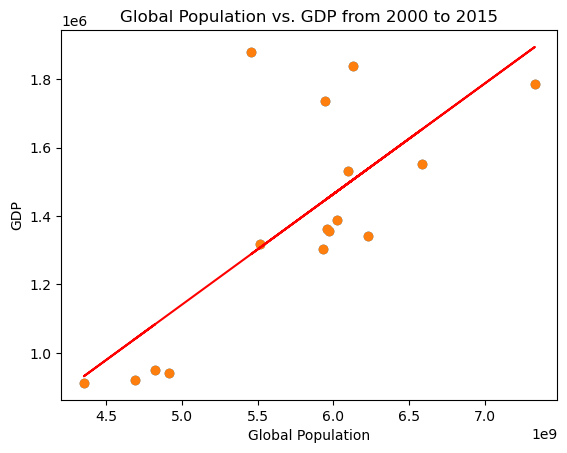

In [61]:
# 2a. Global Yearly Summery Graphs Shengnan
# Compare population and GDP 
x_values = life_expectancy_yearly["Population"]
y_values = life_expectancy_yearly["GDP"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

r_square = round(rvalue**2,2)
r_value = round(rvalue,2)
print(f"The r-value is {r_value} and r-squared is {r_square}")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Global Population vs. GDP from 2000 to 2015")
plt.xlabel('Global Population')
plt.ylabel('GDP')

# Calculate the correlation coefficient and a linear regression model for global change of population vs. GDP
print(f"The correlation between Population and GDP is {round(st.pearsonr(x_values,y_values)[0],2)}")
print(line_eq)

plt.show()

The r-value is 0.02 and r-squared is 0.0
The correlation between Population and Total Expenditure is 0.02
y = 0.0x + 952.89


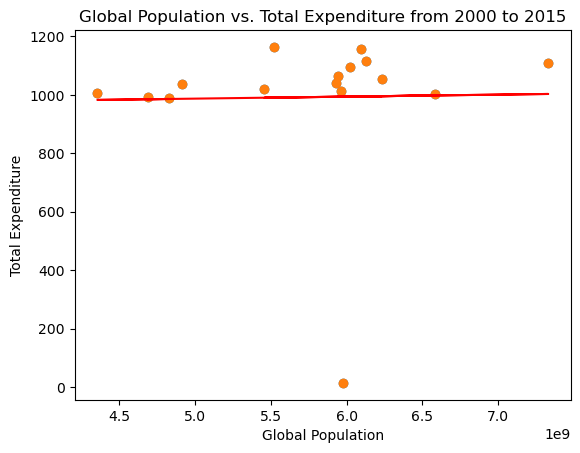

In [65]:
# 2a. Global Yearly Summery Graphs Shengnan
# Compare population and total expenditure
x_values = life_expectancy_yearly["Population"]
y_values = life_expectancy_yearly["Total expenditure"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

r_square = round(rvalue**2,2)
r_value = round(rvalue,2)
print(f"The r-value is {r_value} and r-squared is {r_square}")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Global Population vs. Total Expenditure from 2000 to 2015")
plt.xlabel('Global Population')
plt.ylabel('Total Expenditure')

# Calculate the correlation coefficient and a linear regression model for global change of population vs. GDP
print(f"The correlation between Population and Total Expenditure is {round(st.pearsonr(x_values,y_values)[0],2)}")
print(line_eq)

plt.show()

The r-value is 0.11 and r-squared is 0.01
The correlation between GDP and Total Expenditure is 0.11
y = 0.0x + 863.42


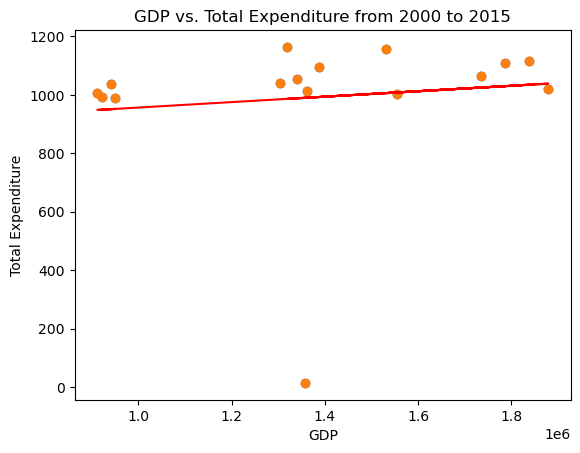

In [63]:
# 2a. Global Yearly Summery Graphs Shengnan
# Compare GDP and total expenditure
x_values = life_expectancy_yearly["GDP"]
y_values = life_expectancy_yearly["Total expenditure"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

r_square = round(rvalue**2,2)
r_value = round(rvalue,2)
print(f"The r-value is {r_value} and r-squared is {r_square}")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("GDP vs. Total Expenditure from 2000 to 2015")
plt.xlabel('GDP')
plt.ylabel('Total Expenditure')

# Calculate the correlation coefficient and a linear regression model for global change of population vs. GDP
print(f"The correlation between GDP and Total Expenditure is {round(st.pearsonr(x_values,y_values)[0],2)}")
print(line_eq)

plt.show()